In [1]:
from collections import Counter
from tdw.controller import Controller
from tdw.tdw_utils import TDWUtils
from tdw.add_ons.third_person_camera import ThirdPersonCamera
from tdw.add_ons.image_capture import ImageCapture
from tdw.backend.paths import EXAMPLE_CONTROLLER_OUTPUT_PATH
from tdw.output_data import OutputData, SegmentationColors
from tdw.add_ons.occupancy_map import OccupancyMap

from pathlib import Path
import os


"""
Please refer to 
1. Segmentation: https://github.com/threedworld-mit/tdw/blob/master/Documentation/lessons/visual_perception/id.md
2. Occupancy Map: https://github.com/threedworld-mit/tdw/blob/master/Documentation/python/add_ons/occupancy_map.md
"""

'\nPlease refer to \n1. Segmentation: https://github.com/threedworld-mit/tdw/blob/master/Documentation/lessons/visual_perception/id.md\n2. Occupancy Map: https://github.com/threedworld-mit/tdw/blob/master/Documentation/python/add_ons/occupancy_map.md\n'

In [2]:
c = Controller(launch_build=False)

Your installed tdw Python module is up to date with PyPi.
You need to launch your own build.


In [3]:
object_id_0 = c.get_unique_id()
object_id_1 = c.get_unique_id()
object_id_2 = c.get_unique_id()
object_id_3 = c.get_unique_id()
object_names = {object_id_0: "small_table_green_marble",
                object_id_1: "blue_side_chair",
                object_id_2: "arflex_strips_sofa",}
                # object_id_3: "jug05"}


In [4]:
cam = ThirdPersonCamera(position={"x": 2.478, "y": 1.602, "z": 1.412},
                        look_at={"x": 0, "y": 0.2, "z": 0},
                        avatar_id="a")
output_directory = Path('images/seg')
output_directory.mkdir(parents=True, exist_ok=True)
print(f"Images will be saved to: {output_directory.resolve()}")
c.add_ons.append(cam)
cap = ImageCapture(path=output_directory, avatar_ids=["a"], pass_masks=["_id", "_img"])
c.add_ons.append(cap)
occupancy = OccupancyMap()
c.add_ons.append(occupancy)
occupancy.generate(cell_size=0.2)

Images will be saved to: /home/pingyue/Work/spatial/simulator/TDW/spatial/images/seg


In [5]:
resp = c.communicate([TDWUtils.create_empty_room(12, 12),
                      {"$type": "set_screen_size", "width": 2048, "height": 2048},
                      c.get_add_object(object_names[object_id_0],
                                       object_id=object_id_0),
                      c.get_add_object(object_names[object_id_1],
                                       position={"x": 0.7, "y": 0, "z": 0.4},
                                       rotation={"x": 0, "y": 30, "z": 0},
                                       object_id=object_id_1),
                      c.get_add_object(model_name=object_names[object_id_2],
                                       position={"x": -0.3, "y": 0.3, "z": -0.2},
                                       object_id=object_id_2),
                    #   c.get_add_object(object_names[object_id_3],
                    #                    position={"x": 0.3, "y": 0.9, "z": -0.2},
                    #                    object_id=object_id_3),
                      {"$type": "send_segmentation_colors",
                       "frequency": "once"}])

In [6]:

print(occupancy.positions[0])

[[-5.5        -5.5       ]
 [-5.3        -5.5       ]
 [-5.1        -5.5       ]
 [-4.9        -5.5       ]
 [-4.7        -5.5       ]
 [-4.5        -5.5       ]
 [-4.3        -5.5       ]
 [-4.1        -5.5       ]
 [-3.9        -5.5       ]
 [-3.7        -5.5       ]
 [-3.5        -5.5       ]
 [-3.3        -5.5       ]
 [-3.1        -5.5       ]
 [-2.8999999  -5.5       ]
 [-2.7        -5.5       ]
 [-2.5        -5.5       ]
 [-2.3        -5.5       ]
 [-2.1        -5.5       ]
 [-1.9        -5.5       ]
 [-1.6999999  -5.5       ]
 [-1.5        -5.5       ]
 [-1.3        -5.5       ]
 [-1.0999999  -5.5       ]
 [-0.8999999  -5.5       ]
 [-0.6999999  -5.5       ]
 [-0.49999994 -5.5       ]
 [-0.29999992 -5.5       ]
 [-0.09999992 -5.5       ]
 [ 0.10000008 -5.5       ]
 [ 0.30000007 -5.5       ]
 [ 0.5000001  -5.5       ]
 [ 0.7000001  -5.5       ]
 [ 0.9000001  -5.5       ]
 [ 1.1000001  -5.5       ]
 [ 1.3000001  -5.5       ]
 [ 1.5000001  -5.5       ]
 [ 1.7        -5.5       ]
 

In [7]:
segm = SegmentationColors(resp[0])


In [8]:
j = 0
segmentation_colors = dict()
object_id = segm.get_object_id(j)
object_name = object_names[object_id]
segmentation_color = segm.get_object_color(j)
segmentation_colors[object_id] = segmentation_color
print(f"object id: {object_id}\nobject_name: {object_name}\nsegmentation_color: {segmentation_color}\nsegmentation_colors: {segmentation_colors}")


object id: 6969785
object_name: small_table_green_marble
segmentation_color: [162 173  63]
segmentation_colors: {6969785: array([162, 173,  63], dtype=int32)}


In [9]:
pil_seg_image = cap.get_pil_images()["a"]["_id"]
pil_rgb_image = cap.get_pil_images()["a"]["_img"]
num_pixels = pil_seg_image.size[0] * pil_seg_image.size[1]

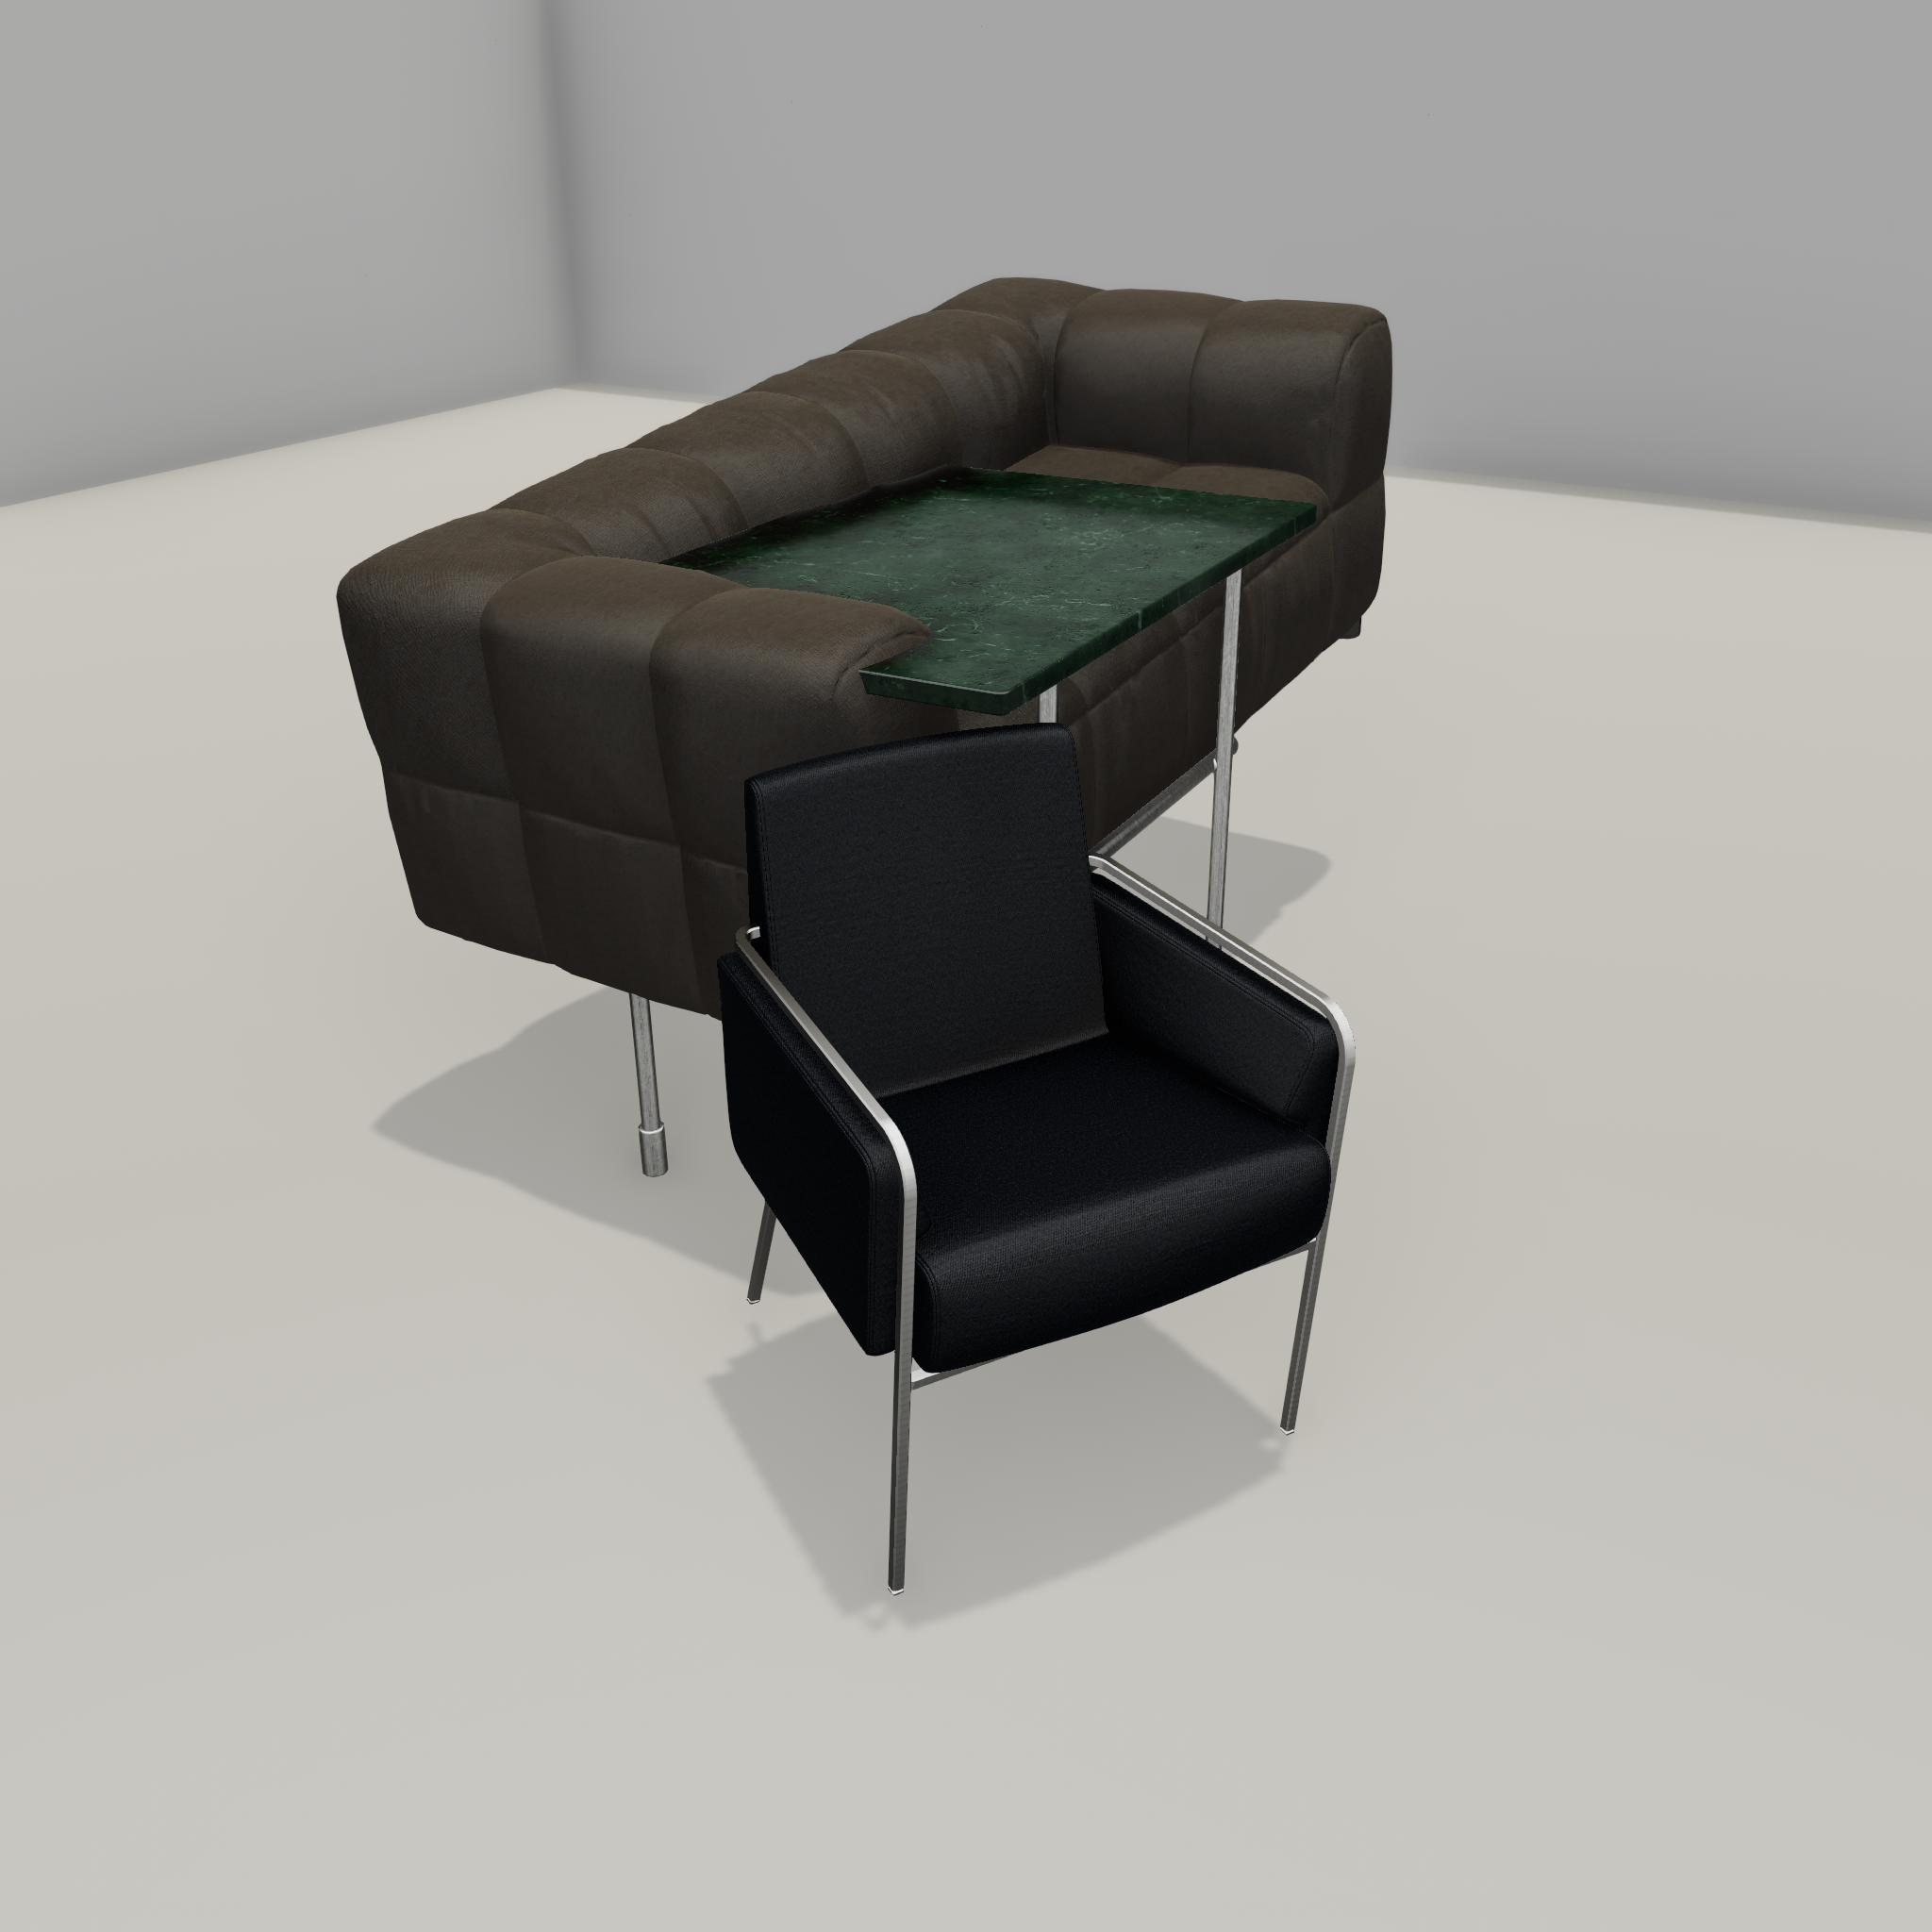

In [10]:
pil_rgb_image

In [11]:
colors = Counter(pil_image.getdata())
print(colors)
# Get the percentage of the image occupied by each object.
for object_id in segmentation_colors:
    segmentation_color = tuple(segmentation_colors[object_id])
    object_name = object_names[object_id]
    if segmentation_color not in colors:
        print(object_name + " is not in the image!")
    else:
        print(object_name + " is in the frame!", float(colors[segmentation_color]) / num_pixels)
# c.communicate({"$type": "terminate"})

Counter({(0, 0, 0): 3836363, (217, 74, 82): 176480, (154, 36, 44): 149108, (182, 197, 97): 18837, (39, 15, 80): 13516})
small_table_green_marble is in the frame! 0.04207611083984375
